
Use "bank-additional-full.csv" dataset


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

##### Load Data & Create a colunmn "conversion" by refering the column "y"

In [2]:
import os

In [3]:
os.getcwd

<function nt.getcwd()>

In [4]:
os.chdir("E:/DSM 1/DATA SET")

In [7]:
df = pd.read_csv('E:/DSM 1/DATA SET/bank-additional-full (1).csv', sep=';')
df['conversion'] = df['y'].apply(lambda x: 1 if x=='yes'else 0)                        

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


###**Aggregate conversion rate tellsthe overall performance of Marketing Campaigns**

##### 1. Break down the customer base into multiple segments according to Education  ***Hint: Use Pivot table***

In [9]:
conversions_by_education_df = pd.pivot_table(
    df,
    values='y',
    index='education',
    columns='conversion',
    aggfunc=len
    ).fillna(0.0)
conversions_by_education_df


conversion,0,1
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


In [10]:
conversions_by_education_df.columns = ['Not Converted', 'Converted']
conversions_by_education_df

,Not Converted,Converted
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


##### **2. To visualize, use pie-chart for each group**

array([<Axes: ylabel='Not Converted'>, <Axes: ylabel='Converted'>],
      dtype=object)

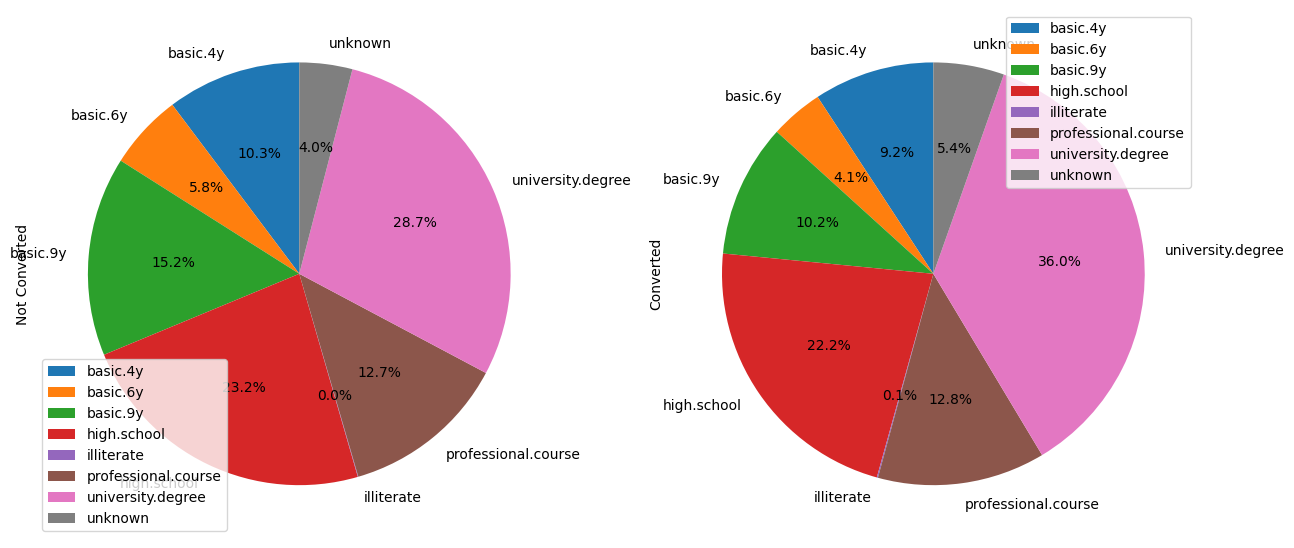

In [12]:
conversions_by_education_df.plot(
    kind='pie',
    figsize=(15,15),
    startangle=90,
    subplots=True,
    autopct= lambda x:'%0.1f%%' % x)

#####**3. Break down the customer base into multiple segments according to Job  ** *Hint : Use Pivot table*

In [13]:
conversions_by_job_df = pd.pivot_table(
    df,
    values='y',
    index='job',
    columns='conversion',
    aggfunc=len
).fillna(0).astype(int)
conversions_by_job_df

conversion,0,1
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


In [14]:
conversions_by_job_df.columns = ['Not Converted', 'Converted']
conversions_by_job_df

,Not Converted,Converted
job,,
admin.,9070,1352
blue-collar,8616,638
entrepreneur,1332,124
housemaid,954,106
management,2596,328
retired,1286,434
self-employed,1272,149
services,3646,323
student,600,275


##### **4. To visualize, use pie-chart for each group**

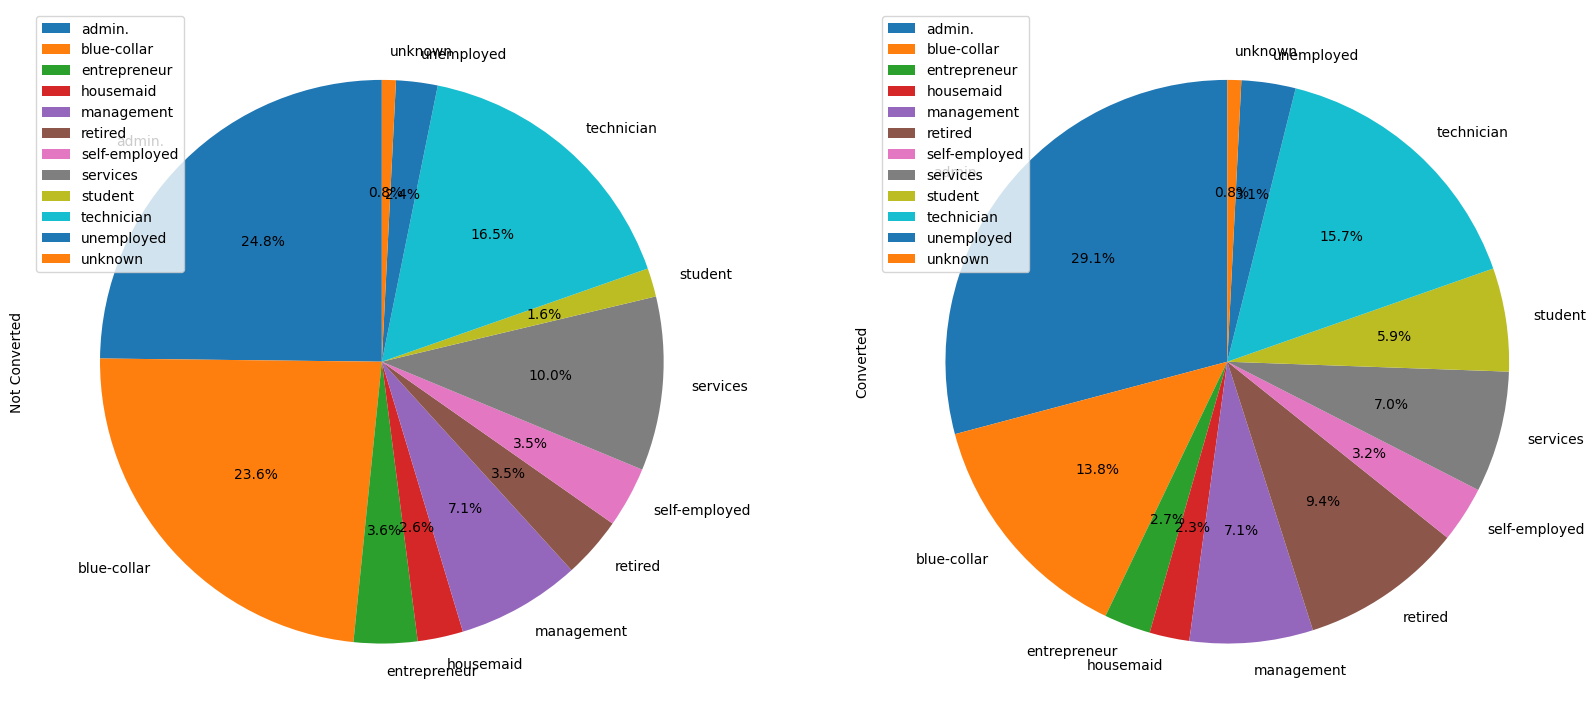

In [15]:

conversions_by_job_df.plot(
    kind='pie',
    figsize=(20,25),
    startangle=90,
    subplots=True,
    autopct= lambda x:'%0.1f%%' % x
)
plt.show()

**Load Advertising data**

In [16]:
os.getcwd()

'E:\\DSM 1\\DATA SET'

In [17]:
df1 = pd.read_csv("E:/DSM 1/DATA SET/Advertising.csv", index_col = 'Date')
df1.head()

,Products,Web,Newspaper,Radio,TV
Date,,,,,
01/01/2018,Mobile,230100,69200,37800,22100
01/02/2018,Mobile,44500,45100,39300,10400
01/03/2018,Mobile,17200,69300,45900,9300
01/04/2018,Mobile,151500,58500,41300,18500
01/05/2018,Mobile,180800,58400,10800,12900


**5. Identify the count of each product**

In [18]:
df1['Products'].unique()


array(['Mobile', 'Electronics', 'Laptops'], dtype=object)

##### **6.Display media wise product count**

In [19]:
media_counts = df1.groupby('Products')[['Web', 'Newspaper', 'Radio', 'TV']].count()
media_counts

,Web,Newspaper,Radio,TV
Products,,,,
Electronics,53,53,53,53
Laptops,18,18,18,18
Mobile,129,129,129,129
